In [56]:
import os, sys
import time

from collections import defaultdict

import matplotlib.pyplot as plt
    
import bz2
import gzip
import zlib

In [38]:
sklearn_path = (
    "/home/nano/projects/tree-ensemble-model-management/models/sklearn/pathological"
)

xgboost_path = "/home/nano/projects/tree-ensemble-model-management/models/xgboost/5days"

In [49]:
def compression_test(model_folder, compression_func, decompression_func):
    compression_ratios = defaultdict(list)
    dt_compress = defaultdict(list)
    dt_decompress = defaultdict(list)

    for model_file in os.listdir(model_folder):
        full_path = os.path.join(model_folder, model_file)
        with open(full_path, "rb") as f:
            model_binary = f.read()
        # Before Compression
        uncompressed_size = sys.getsizeof(model_binary)

        # Compress with multiple factors
        for i in range(1, 10):
            # Compress
            t0 = time.time()
            compressed_model = compression_func(model_binary, i)
            dt_compress[i].append(time.time() - t0)
            # Decompress
            t0 = time.time()
            decompressed_model = decompression_func(compressed_model)
            dt_decompress[i].append(time.time() - t0)

            assert model_binary == decompressed_model
            compressed_size = sys.getsizeof(compressed_model)
            compression_ratios[i].append(uncompressed_size / compressed_size)

    # Compute averages
    avg_compression_ratios = {}
    for key, value in compression_ratios.items():
        avg_compression_ratios[key] = sum(value) / len(value)

    avg_dt_compress = {}
    for key, value in dt_compress.items():
        avg_dt_compress[key] = sum(value) / len(value)

    avg_dt_decompress = {}
    for key, value in dt_decompress.items():
        avg_dt_decompress[key] = sum(value) / len(value)

    return avg_compression_ratios, avg_dt_compress, avg_dt_decompress

In [91]:
def compression_ratio_plot(plot_title, ylabel, gzip_ratios, zlib_ratios, bz2_ratios):
    import matplotlib.pyplot as plt

    # Example data (compression ratios at different levels for each algorithm)
    compression_levels = [1, 2, 3, 4, 5, 6, 7, 8, 9]

    bar_width = 0.25  # Width of each bar

    # Set the positions of the bars on the X-axis
    bar_positions_gzip = [i for i in range(len(compression_levels))]
    bar_positions_zlib = [i + bar_width for i in range(len(compression_levels))]
    bar_positions_bz2 = [i + 2 * bar_width for i in range(len(compression_levels))]

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Plot the bars for each algorithm
    ax.bar(
        bar_positions_gzip, list(gzip_ratios.values()), width=bar_width, label="gzip"
    )
    ax.bar(
        bar_positions_zlib, list(zlib_ratios.values()), width=bar_width, label="zlib"
    )
    ax.bar(bar_positions_bz2, list(bz2_ratios.values()), width=bar_width, label="bz2")

    # Set the X-axis labels and ticks
    ax.set_xlabel("Compression Levels")
    ax.set_ylabel(ylabel)
    ax.set_title(plot_title)
    ax.set_xticks([i + bar_width for i in range(len(compression_levels))])
    ax.set_xticklabels(compression_levels)

    # Add legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
    pass

In [89]:
def compression_wrapper(model_folder):
    # GZIP
    gzip_ratios, gzip_dt_compress, gzip_dt_decompress = compression_test(
        model_folder, gzip.compress, gzip.decompress
    )
    # ZLIB
    zlib_ratios, zlib_dt_compress, zlib_dt_decompress = compression_test(
        model_folder, zlib.compress, zlib.decompress
    )
    # BZ2
    bz2_ratios, bz2_dt_compress, bz2_dt_decompress = compression_test(
        model_folder, bz2.compress, bz2.decompress
    )

    compression_ratio_plot(
        "Compression Ratios by Algorithm and Level",
        "Compression Ratio",
        gzip_ratios,
        zlib_ratios,
        bz2_ratios,
    )
    compression_ratio_plot(
        "dt_Compress by Algorithm and Level",
        "dt_Compress in Seconds",
        gzip_dt_compress,
        zlib_dt_compress,
        bz2_dt_compress,
    )
    compression_ratio_plot(
        "dt_Decompress by Algorithm and Level",
        "dt_Decompress in Seconds",
        gzip_dt_decompress,
        zlib_dt_decompress,
        bz2_dt_decompress,
    )

TypeError: set_ylabel() missing 1 required positional argument: 'ylabel'

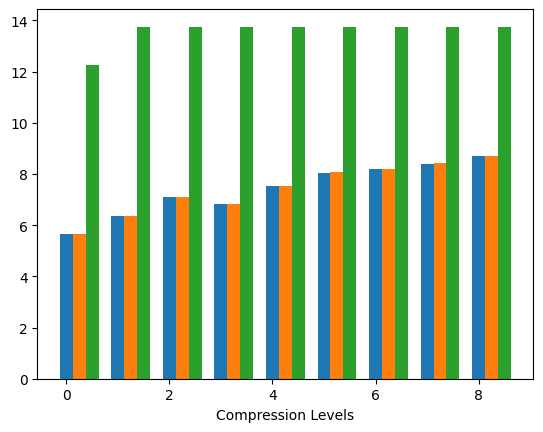

In [90]:
compression_wrapper(sklearn_path)

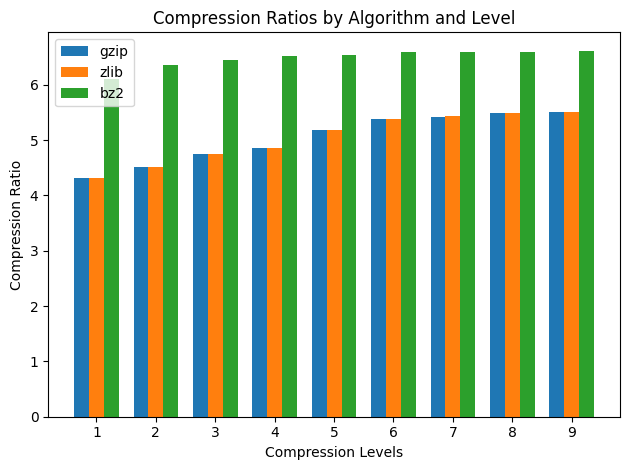

In [78]:
compression_wrapper(xgboost_path)